<a href="https://colab.research.google.com/github/mj0lkpaket/Applied-Deep-Learning-in-physics-and-engineering/blob/main/Exercise_6_2_KERAS_complicated_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6.2
## Interpolation
In this task, we implement a simple NN to learn a complicated function.

In [17]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

keras.backend.clear_session()

layers = keras.layers

### Generation of data

In [18]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

Let's simulate the train data

In [19]:
N_train = 10 ** 4  # number of training samples
# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + np.random.standard_normal(xtrain.shape)  # train data includes some noise

In [20]:
print("xtrain.shape", xtrain.shape)
print("ytrain.shape", ytrain.shape)

xtrain.shape (10000, 1)
ytrain.shape (10000, 1)


Simulate test data

In [21]:
N_test = 10000  # number of testing samples
xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [22]:
print("xtest.shape", xtest.shape)
print("ytest.shape", ytest.shape)

xtest.shape (10000,)
ytest.shape (10000,)


### Define Model

Define the number of nodes, the number of layers, and choose an activation function.
Use `keras.regularizers` to use parameter norm penalties or add a dropout layer via `layers.Dropout(fraction)`.

You may use the skeleton below:

In [23]:
nb_nodes = 10
nb_layers = 10
activation = "relu"

model = keras.models.Sequential(name="1Dfit")
for i in range(0,nb_layers-1):
  model.add(layers.Dense(nb_nodes, activation=activation, input_dim=xtrain.shape[1]))  # first layer

model.add(layers.Dense(1))  # final layer

layers.Dropout(0.5)

print(model.summary())

Model: "1Dfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110   

### Compile the model (set an objective and choose an optimizer)

Choose an optimizer from `keras.optimizers`, e.g., `adam = keras.optimizers.Adam(learning_rate=0.001)`.

Further, choose the correct objective (loss) for this <b>regression task</b>.

In [24]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = keras.losses.MeanSquaredError(), optimizer= adam)

### Train the model

Train the network for a couple of epochs and save the model several times in between.

In [25]:
epochs = 3
save_period = 1  # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-{epoch:02d}.hdf5", save_weights_only=True, save_freq=save_period)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Epoch 1/3
157/157 [==============================] - 7s 30ms/step - loss: 8.0111
Epoch 2/3
157/157 [==============================] - 4s 27ms/step - loss: 3.4856
Epoch 3/3
157/157 [==============================] - 4s 23ms/step - loss: 3.3156


Compare the performance of the model during the training. You may use the skeleton below:

313/313 [==============================] - 1s 2ms/step


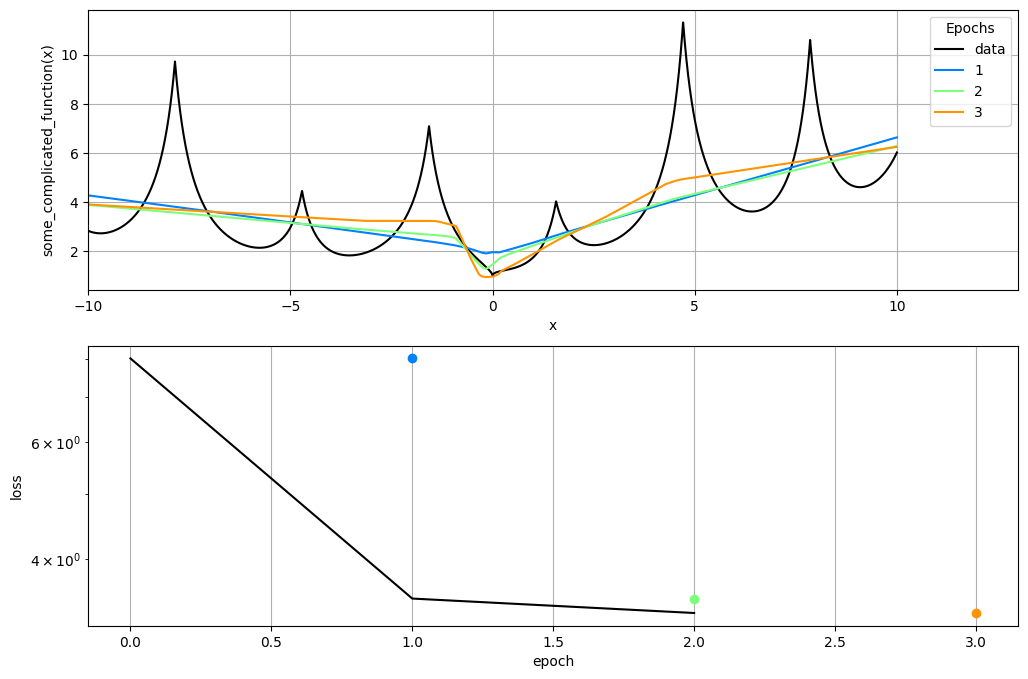

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.hdf5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()

It can be seen that the MSE decreases for every epoch, but most significantly from the first to the second one. By just analyzing the output visually it also seems like the generated model has the best fit around 0.